In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime

In [2]:
infile = open('all_hydro.pkl','rb')
df2 = pickle.load(infile)

crownest = df2.where(df2['STATION_NAME']=='CROWSNEST RIVER NEAR LUNDBRECK')

crownest_flow = crownest['FLOW']

In [3]:
crownest_flow = crownest_flow.dropna()

In [4]:
x = crownest_flow.resample("M", how='mean')

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [5]:
x.head()

DATE
1908-09-30    4.304000
1908-10-31    4.226129
1908-11-30         NaN
1908-12-31         NaN
1909-01-31         NaN
Freq: M, Name: FLOW, dtype: float64

In [9]:
x

DATE
1908-09-30     4.304000
1908-10-31     4.226129
1908-11-30          NaN
1908-12-31          NaN
1909-01-31          NaN
1909-02-28          NaN
1909-03-31          NaN
1909-04-30     6.651250
1909-05-31    23.992258
1909-06-30    40.453334
1909-07-31    22.235484
1909-08-31    11.181290
1909-09-30     5.301000
1909-10-31     4.054516
1909-11-30     4.958333
1909-12-31          NaN
1910-01-31          NaN
1910-02-28          NaN
1910-03-31          NaN
1910-04-30    12.586333
1910-05-31    16.500000
1910-06-30    12.732333
1910-07-31     6.949677
1910-08-31     3.901290
1910-09-30     3.797000
1910-10-31     6.201290
1910-11-30     5.325000
1910-12-31          NaN
1911-01-31     2.410968
1911-02-28     2.573214
                ...    
1928-12-31     3.579032
1929-01-31     2.411613
1929-02-28     2.291786
1929-03-31     4.237742
1929-04-30     4.535000
1929-05-31    17.893548
1929-06-30    24.799334
1929-07-31     7.063548
1929-08-31     3.563871
1929-09-30     3.040333
1929-10-31 

In [6]:
len(x.where(x == np.nan))

273

In [7]:
len(x)

273

In [8]:
len(x.dropna())

263

In [9]:
263/273

0.9633699633699634

In [12]:
12*100

1200

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


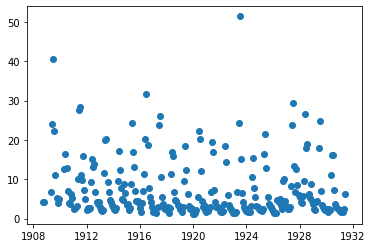

In [10]:
plt.scatter(x.index, x)

In [14]:
(1932-1908+2)*12

312

In [15]:
312-273

39

Fill NaNs by the last value

In [11]:
streamflow = x.fillna(method='ffill')

In [12]:
streamflow.head()

DATE
1908-09-30    4.304000
1908-10-31    4.226129
1908-11-30    4.226129
1908-12-31    4.226129
1909-01-31    4.226129
Freq: M, Name: FLOW, dtype: float64

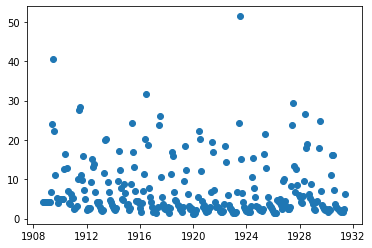

In [13]:
plt.scatter(streamflow.index, streamflow)

Fill NaNs by the next value

In [14]:
x_streamflow = x.fillna(method='bfill')

In [16]:
x_streamflow.head()

DATE
1908-09-30    4.304000
1908-10-31    4.226129
1908-11-30    6.651250
1908-12-31    6.651250
1909-01-31    6.651250
Freq: M, Name: FLOW, dtype: float64

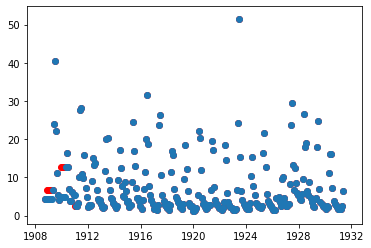

In [18]:
plt.scatter(x_streamflow.index, x_streamflow, color='red')
plt.scatter(streamflow.index, streamflow)

In [29]:
len(streamflow.index)

273

In [33]:
1932-1908

24

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation

The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

Autocorrelation is the tendency for observations made at adjacent time points to be related to one another. 

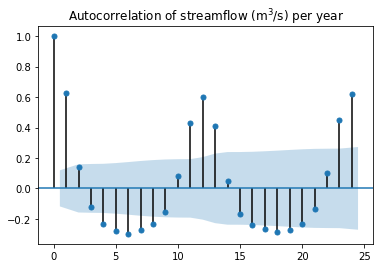

In [37]:
plot_acf(streamflow, lags=24, title="Autocorrelation of streamflow (m$^3$/s) per year")
plt.show()

"A negative autocorrelation implies that if a particular value is above average the next value (or for that matter the previous value) is more likely to be below average. If a particular value is below average, the next value is likely to be above average."

Not all the lags are greater than the confidence interval, not all statistically significant.
The data seems to be correlated by batches of ~ 4 years, which would be the seasonality.

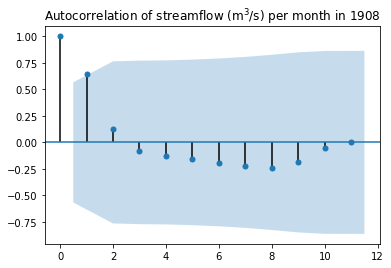

In [42]:
plot_acf(streamflow[0:12], title="Autocorrelation of streamflow (m$^3$/s) per month in 1908")
plt.show()

Not statistically significant.

# Partial autocorrelation

The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

 It helps you come up with a possible order for the auto regressive term.

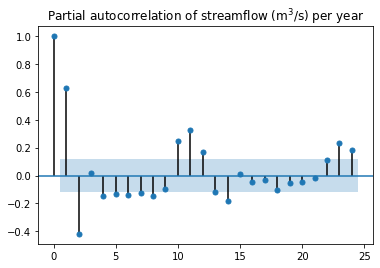

In [38]:
plot_pacf(streamflow, lags=24, title="Partial autocorrelation of streamflow (m$^3$/s) per year")
plt.show()

Similar statistical significance.

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


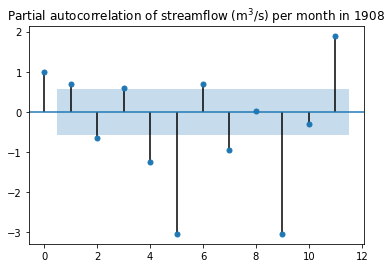

In [43]:
plot_pacf(streamflow[0:12], title="Partial autocorrelation of streamflow (m$^3$/s) per month in 1908")
plt.show()

# Decomposition

Trend - Consistent upwards or downwards slope of a time series

Seasonality - Clear periodic pattern of a time series(like sine funtion)

Noise - Outliers or missing values

In [46]:
import statsmodels.api as sm
from pylab import rcParams

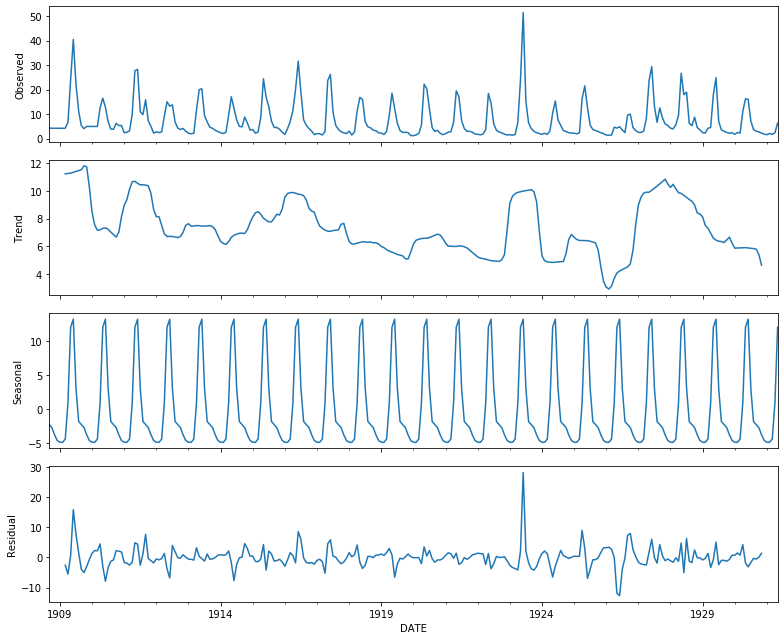

In [47]:
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(streamflow,freq=12) # monthly frequency
figure = decomposed.plot()
plt.show()

There is no visible upward trend, so it is not clear if the streamflow is being affected by climate change in this scale.

Streamflow peak (possible flood) seems to happen every year.

Check what happened in 1924, anomaly.

# Stationarity

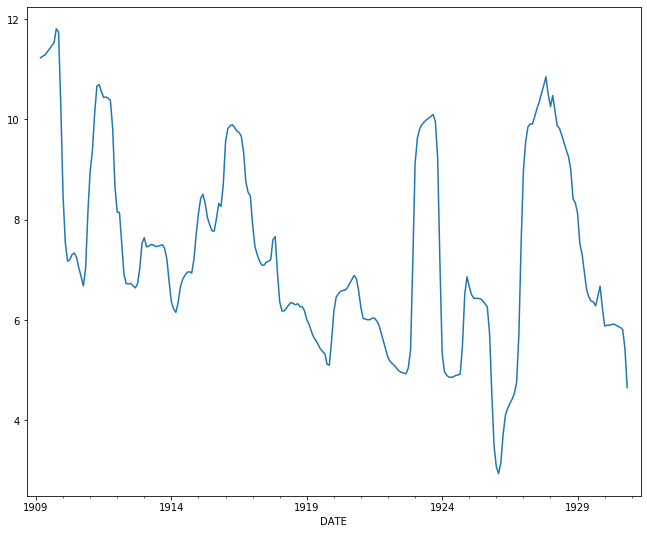

In [50]:
decomposed.trend.plot()

diff() method can easily convert a non-stationary series to a stationary series.
Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is the element in the same column of the previous row).

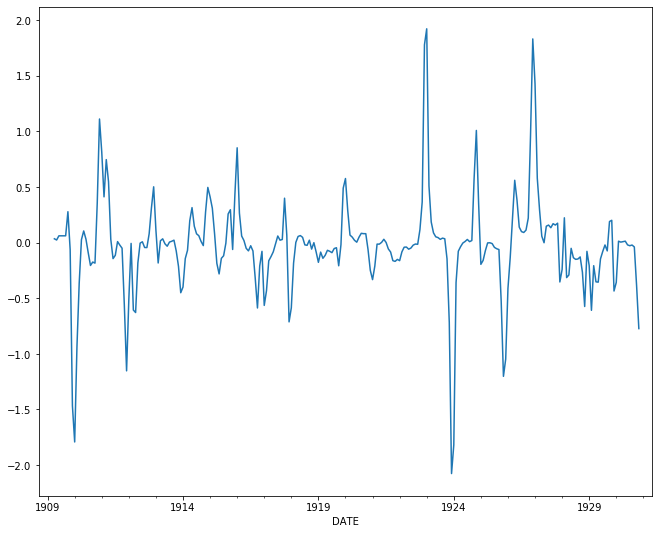

In [51]:
decomposed.trend.diff().plot()

In [54]:
len(decomposed.trend)

273

In [55]:
import pickle

In [56]:
with open('monthly_streamflow.pickle', 'wb') as handle:
    pickle.dump(x, handle)

In [57]:
with open('monthly_streamflow.pickle', 'rb') as handle:
    b = pickle.load(handle)